# Media Company Case Study

Problem Statement: A digital media company (similar to Voot, Hotstar, Netflix, etc.) had launched a show. Initially, the show got a good response, but then witnessed a decline in viewership. The company wants to figure out what went wrong.

In [197]:
# Importing all required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [245]:
media=pd.read_csv("mediacompany.csv")
media.drop("Unnamed: 7",axis=1,inplace=True)
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A
0,3/1/2017,183738,1260228,1706478,1060860448,0,0
1,3/2/2017,193763,1270561,1690727,1031846645,0,0
2,3/3/2017,210479,1248183,1726157,1010867575,0,0
3,3/4/2017,240061,1492913,1855353,1079194579,1,0
4,3/5/2017,446314,1594712,2041418,1357736987,0,0


In [199]:
# Assuming media['Date'] is a column in a DataFrame and it's already converted to datetime format
media['Date'] = pd.to_datetime(media['Date'])

# Extracting day component
media['day'] = media['Date'].dt.day

In [248]:
def get_day_info(date):
    # Convert date to Pandas datetime format
    date = pd.to_datetime(date)
    
    # Define start date
    start_date = pd.to_datetime('2017-03-01')
    
    # Calculate difference in days
    delta_days = (date - start_date).days + 1
    
    # Get day of the week
    day_of_week = date.day_name()
    
    # Get month
    month = date.month_name()
    
    # Determine if it's a weekend (Saturday or Sunday)
    is_weekend = 1 if day_of_week in ['Saturday', 'Sunday'] else 0
    
    return day_of_week, delta_days, month, is_weekend


In [257]:
media[['Week_Day', 'Day', 'Month', 'IsWeekend']] = media['Date'].apply(lambda x: pd.Series(get_day_info(x)))


In [253]:
media.head()

,Date,Views_show,Visitors,Views_platform,Ad_impression,Cricket_match_india,Character_A,DayOfWeek,DayFromStart,Month,IsWeekend,Day
0,3/1/2017,183738,1260228,1706478,1060860448,0,0,Wednesday,1,March,0,Wednesday
1,3/2/2017,193763,1270561,1690727,1031846645,0,0,Thursday,2,March,0,Thursday
2,3/3/2017,210479,1248183,1726157,1010867575,0,0,Friday,3,March,0,Friday
3,3/4/2017,240061,1492913,1855353,1079194579,1,0,Saturday,4,March,1,Saturday
4,3/5/2017,446314,1594712,2041418,1357736987,0,0,Sunday,5,March,1,Sunday


<Axes: xlabel='Day'>

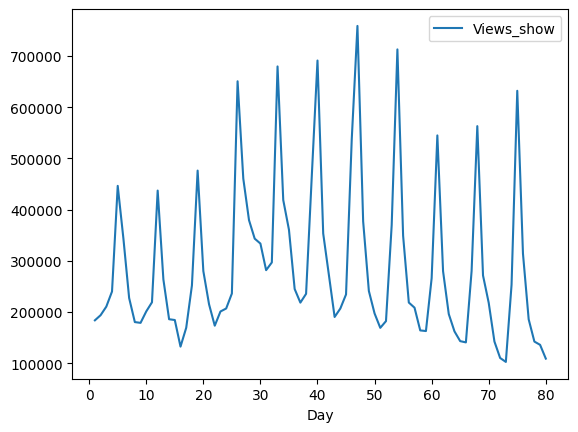

In [258]:
# days vs Views_show
media.plot.line(x='Day', y='Views_show')


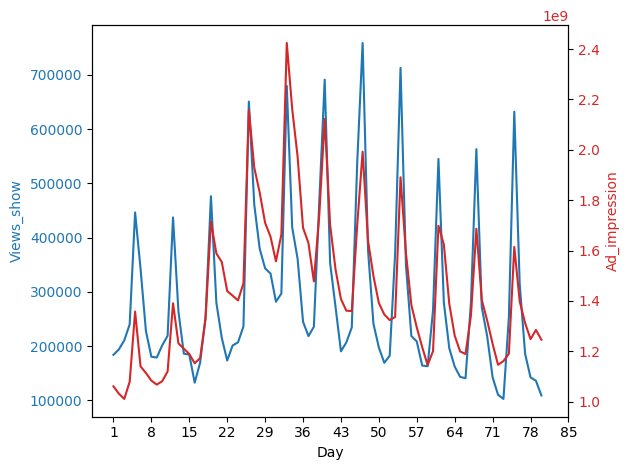

In [217]:
# Plotting
fig, ax1 = plt.subplots()

color1 = 'tab:blue'
ax1.set_xlabel('Day')
ax1.set_ylabel('Views_show', color=color1)
ax1.plot(media['Day'], media['Views_show'], color=color1)
ax1.tick_params(axis='y', labelcolor=color1)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color2 = 'tab:red'
ax2.set_ylabel('Ad_impression', color=color2)  # we already handled the x-label with ax1
ax2.plot(media['Day'], media['Ad_impression'], color=color2)
ax2.tick_params(axis='y', labelcolor=color2)
# Adjust x-axis ticks to show every 7 days
ax1.set_xticks(range(1, 90, 7))

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()


In [139]:
# Calculate the correlation coefficient
correlation_coefficient = media['Views_show'].corr(media['Ad_impression'])
print("Correlation coefficient between Views_show and Ad_impression:", correlation_coefficient)


Correlation coefficient between Views_show and Ad_impression: 0.7856729686619297


#### Running first model (lm1) Weekday & visitors 

In [266]:
# Putting feature variable to X
X = media[['Visitors','IsWeekend']]

# Putting response variable to y
y = media['Views_show']

In [267]:
X

,Visitors,IsWeekend
0,1260228,0
1,1270561,0
2,1248183,0
3,1492913,1
4,1594712,1
...,...,...
75,1808684,0
76,1814227,0
77,1755803,0
78,1749654,0


In [268]:
from sklearn.linear_model import LinearRegression

In [269]:
# Representing LinearRegression as lm(Creating LinearRegression Object)
lm = LinearRegression()

In [270]:
lm.fit(X,y)

LinearRegression()

In [271]:
import statsmodels.api as sm
#Unlike SKLearn, statsmodels don't automatically fit a constant, 
#so you need to use the method sm.add_constant(X) in order to add a constant. 
X = sm.add_constant(X)
# create a fitted model in one line
lm_1 = sm.OLS(y,X).fit()
print(lm_1.summary())

                            OLS Regression Results                            
Dep. Variable:             Views_show   R-squared:                       0.500
Model:                            OLS   Adj. R-squared:                  0.487
Method:                 Least Squares   F-statistic:                     38.55
Date:                Sat, 25 May 2024   Prob (F-statistic):           2.51e-12
Time:                        02:38:25   Log-Likelihood:                -1041.3
No. Observations:                  80   AIC:                             2089.
Df Residuals:                      77   BIC:                             2096.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -8.833e+04   1.01e+05     -0.875      0.3

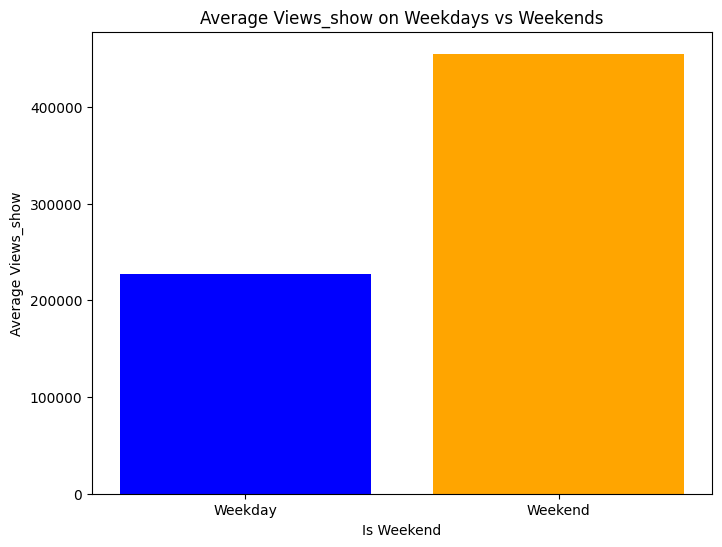

In [264]:
weekend_data = media.groupby('IsWeekend')['Views_show'].mean().reset_index()


plt.figure(figsize=(8, 6))
plt.bar(weekend_data['IsWeekend'].astype(str), weekend_data['Views_show'], color=['blue', 'orange'])
plt.xlabel('Is Weekend')
plt.ylabel('Average Views_show')
plt.title('Average Views_show on Weekdays vs Weekends')
plt.xticks(ticks=[0, 1], labels=['Weekday', 'Weekend'])
plt.show()









#### Running first model (lm1) Weekends & visitors 

In [ ]:
X=